# Figure 2. PCA & t-SNE

19개 암종에 대한 그래프

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import random
import warnings 
warnings.filterwarnings(action='ignore')

## Load Data

In [ ]:
df=pd.read_csv('./New_Data/TCGA_GTEX_SLC_103.csv')

In [ ]:
# GTEx 제거
df=df[df['label_GTEx_100']!=100]
df.reset_index(drop=True, inplace=True)

In [ ]:
# target list 생성
targets = df['cancer'].unique().tolist()

## PCA

In [ ]:
x = df.drop(['sample','TCGA_GTEX_main_category','label','cancer','label_GTEx_100'], axis=1).values 
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

In [ ]:
pca = PCA(n_components=2) # 주성분 개수: 2개
printcipalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['f1','f2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [ ]:
label = df['cancer'] # label 생성
label = label.to_list()

finalDf = principalDf 
finalDf['label'] = label

In [ ]:
# 색깔 지정
colors = ['#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00',
 '#cab2d6','#6a3d9a','#ffff99','#b15928','#bbbbbb','#ffd56b','#4a503d',
 '#04009a','#7b113a','#e4bad4','#fed049']

random.Random(6).shuffle(colors)

colors_ = colors

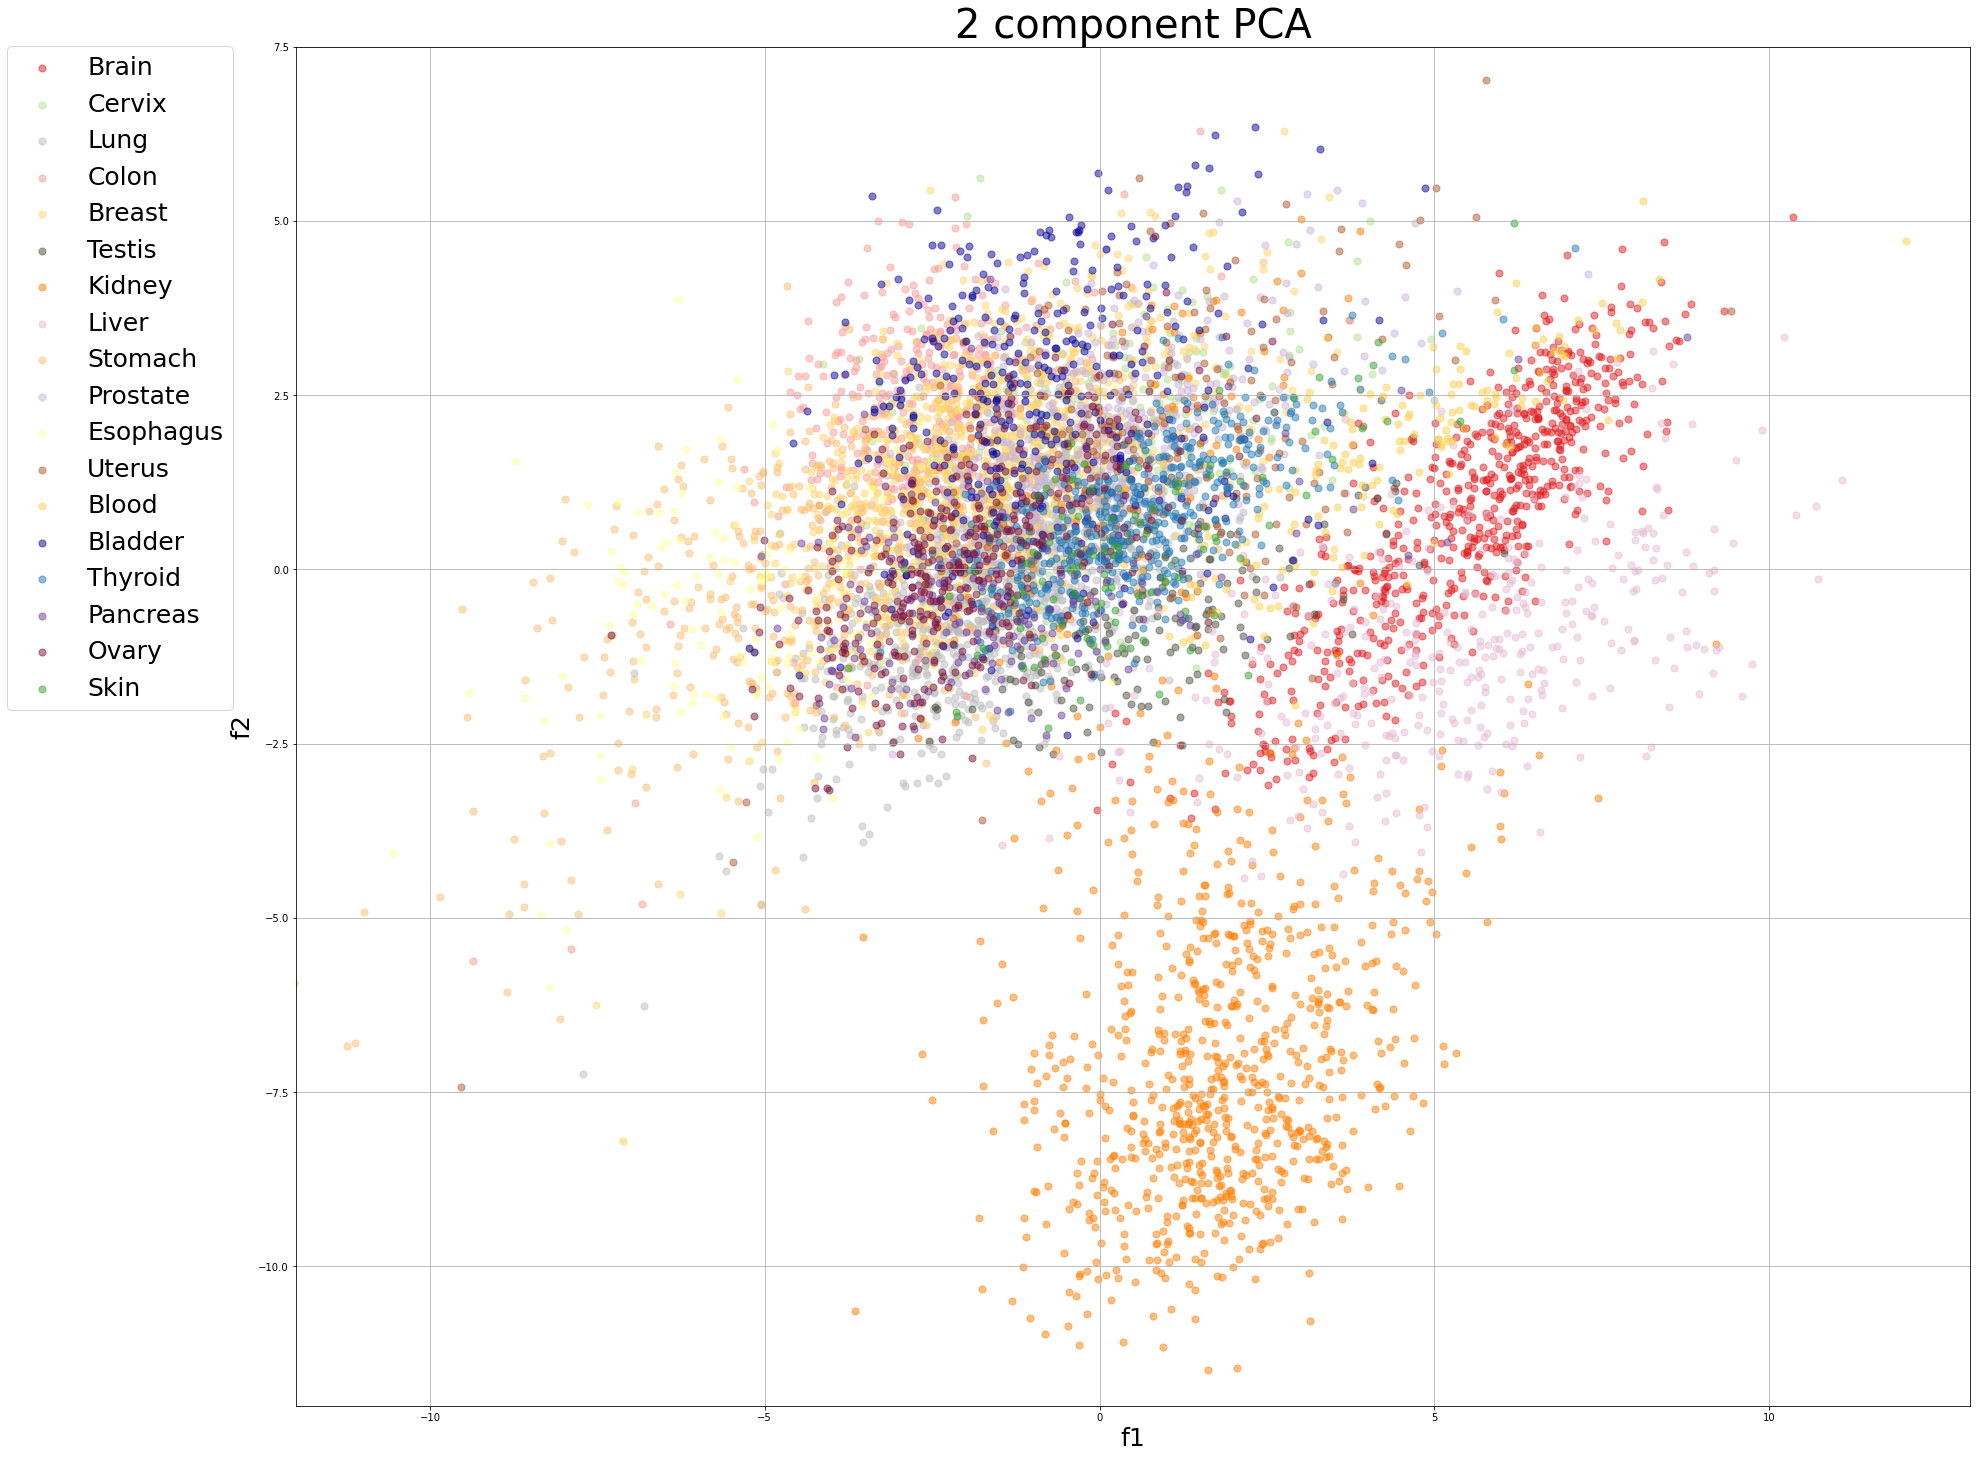

In [ ]:
# PCA 그래프 그리기
fig = plt.figure(figsize = (30, 25))
plt.xlim([-12, 13])
plt.ylim([-12, 7.5])

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('f1', fontsize = 25)
ax.set_ylabel('f2', fontsize = 25)
ax.set_title('2 component PCA', fontsize=40)

for target, color in zip(targets, colors_):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'f1']
               , finalDf.loc[indicesToKeep, 'f2']
               , c = color
               , s = 50
               , alpha = 0.5)

ax.legend(targets, fontsize=25, bbox_to_anchor=(-0.03, 1.01))
ax.grid()

plt.savefig('./Figure/PCA19_label.png')

## T-SNE

In [ ]:
tsne = TSNE(n_components = 2, verbose = 1, n_iter = 300) # , perplexity = 40

In [ ]:
x = df.drop(['sample','TCGA_GTEX_main_category','label','cancer','label_GTEx_100'], axis=1).values 

In [ ]:
tsneNDArray = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8031 samples in 0.001s...
[t-SNE] Computed neighbors for 8031 samples in 1.350s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8031
[t-SNE] Computed conditional probabilities for sample 2000 / 8031
[t-SNE] Computed conditional probabilities for sample 3000 / 8031
[t-SNE] Computed conditional probabilities for sample 4000 / 8031
[t-SNE] Computed conditional probabilities for sample 5000 / 8031
[t-SNE] Computed conditional probabilities for sample 6000 / 8031
[t-SNE] Computed conditional probabilities for sample 7000 / 8031
[t-SNE] Computed conditional probabilities for sample 8000 / 8031
[t-SNE] Computed conditional probabilities for sample 8031 / 8031
[t-SNE] Mean sigma: 3.557207
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.493629
[t-SNE] KL divergence after 300 iterations: 2.533206


In [ ]:
# label 생성
labels = df['cancer']
labels = labels.to_list()

In [ ]:
df_tsne = pd.DataFrame(tsneNDArray, columns=['f1','f2'])
df_tsne['label'] = labels

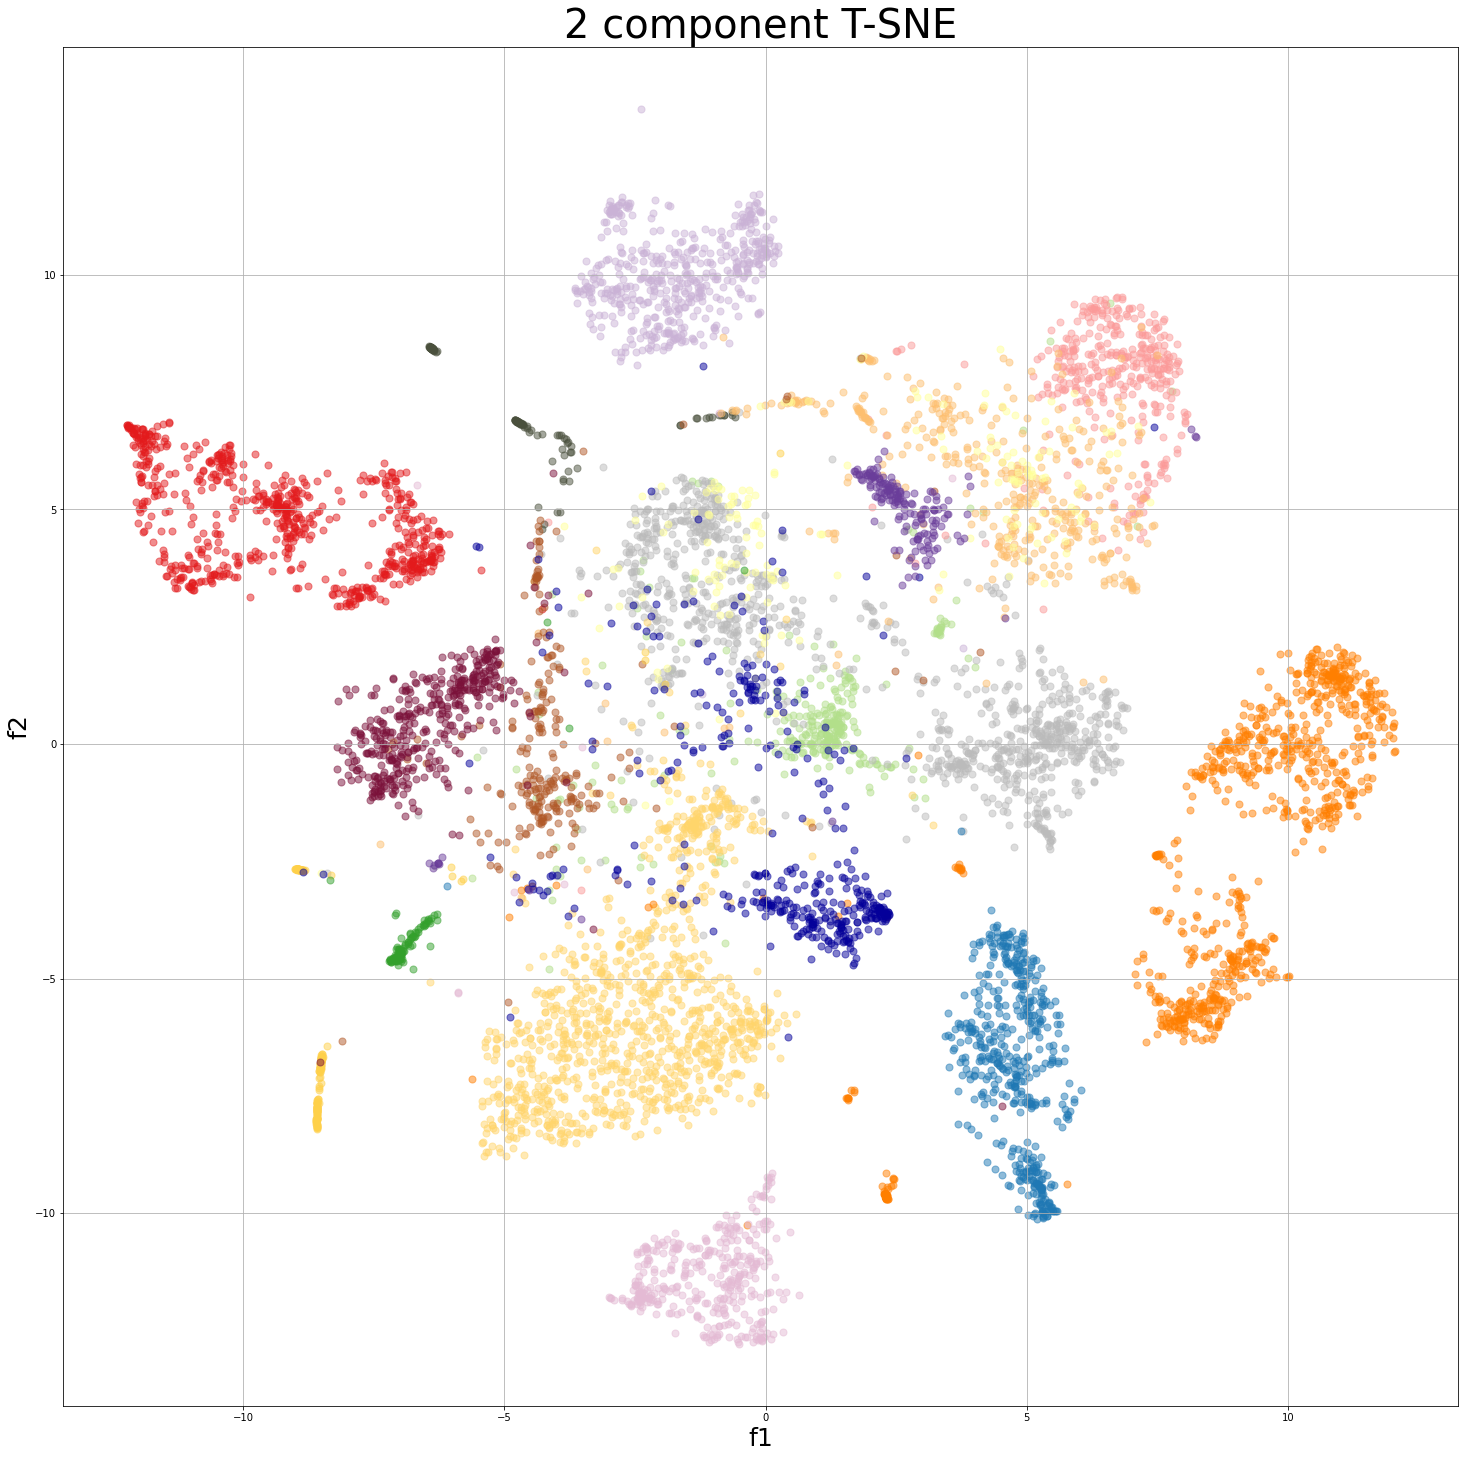

In [ ]:
# T-SNE 그래프 그리기
figure, axesSubplot = plt.subplots(figsize = (25, 25))

axesSubplot.set_xlabel('f1', fontsize = 25)
axesSubplot.set_ylabel('f2', fontsize = 25)
axesSubplot.set_title('2 component T-SNE', fontsize=40)

for target, color in zip(targets, colors_):
    indicesToKeep = df_tsne['label'] == target
    axesSubplot.scatter(df_tsne.loc[indicesToKeep, 'f1']
               , df_tsne.loc[indicesToKeep, 'f2']
               , c = color
               , s = 50
               , alpha = 0.5)
    
#axesSubplot.legend(targets, fontsize=19)
axesSubplot.grid()

plt.savefig('./Figure/T_SNE19.png')